## Artificial Neural Network for Image Classification (STUDNET)
Billy Hau (7/20/2022)

In this notebook, we will do a case study for classifying images using Artificial Neural Network. Back in the early days of computer vision, this is a very difficult task. Programmer has to manually extract different features from the images to classify them. Luckily, with Deep Learning, this process is done automatically during training! 

In [1]:
# Import the Typical Libraries
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST Dataset from TensorFlow
# Please note that there are several toy dataset built-in that we can play with!
# mnist / fashion mnist / cifar10

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


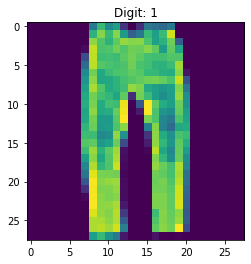

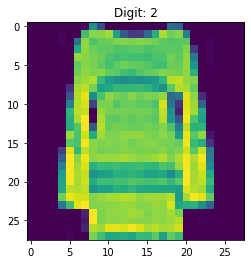

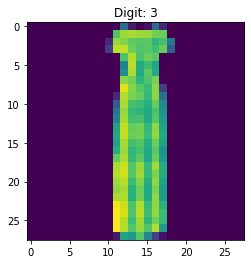

In [3]:
# Let's randomly display a couple image and print their labels

id_list = np.random.randint(low=0, high=x_train.shape[0], size=3)

for id in id_list:
    plt.figure()
    plt.imshow(x_train[id])    
    plt.title(f'Digit: {y_train[id]}')


In [4]:
# Let's Take a Look at the Dataset Dimension... 
# Pay attention to the width and height of each image!
x_train.shape

(60000, 28, 28)

In [5]:
# Let's think about how to predict the digits... 
# Are we going to build a regression model? A classification model?
# Let's do classification! Specifically, a model-class classificiation model.
# It is basically a model that predict a label from multiple classes
# Right now y_train and y_test are like [1, 3, 5, 3, ...]
# Which is not good for classificiation, let's OneHotEcode it!

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train2 = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test2 = encoder.transform(y_test.reshape(-1, 1)).toarray()

In [6]:
y_train2.shape

(60000, 10)

In [7]:
# The image is currently 28 x 28... which we cannot input to the ANN. 
# Why don't we flatten it into a 1D array?
# That way, we can easily fit it into the ANN!
# Well technically, it will be a 2D array after transformation, an array of arrays.

x_train2 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test2 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [8]:
# Next, let's build a simple ANN
# Input Layer - Hidden Layers - Output Layer

input = keras.layers.Input((x_train2.shape[1]))
x = keras.layers.Dense(16, activation='relu')(input)
x = keras.layers.Dense(16, activation='relu')(x)
x = keras.layers.Dense(16, activation='relu')(x)
output = keras.layers.Dense(y_train2.shape[1], activation='softmax')(x)


In [9]:
# Build the Model
model = keras.Model(input, output)

In [10]:
# Compile the Model with Adam / Categorical Cross-Entropy / Categorical Accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [11]:
# Let's Take a Look at the Model Architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the Model (Decrease batch_size if you don't have a GPU!)
history = model.fit(x_train2, y_train2, epochs=10, batch_size=4096, validation_data=(x_test2, y_test2))

Epoch 1/10
15/15 [==============================] - 4s 18ms/step - loss: 44.6861 - categorical_accuracy: 0.1181 - val_loss: 3.1656 - val_categorical_accuracy: 0.0498
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 2.5708 - categorical_accuracy: 0.0679 - val_loss: 2.3371 - val_categorical_accuracy: 0.0822
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 2.3178 - categorical_accuracy: 0.0985 - val_loss: 2.3036 - val_categorical_accuracy: 0.1105
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 2.3022 - categorical_accuracy: 0.1101 - val_loss: 2.2948 - val_categorical_accuracy: 0.1129
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 2.2943 - categorical_accuracy: 0.1128 - val_loss: 2.2851 - val_categorical_accuracy: 0.1165
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 2.2830 - categorical_accuracy: 0.1156 - val_loss: 2.2705 - val_categorical_accuracy: 0.1218
Epoch 7/10
15/

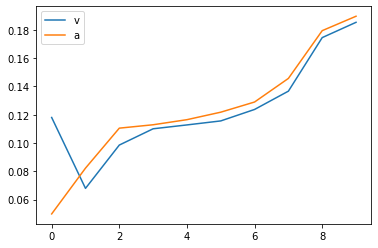

In [13]:
# Plot and Evaluate the Model
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend('accuracy')
plt.legend('val_accuracy')

In [14]:
# Let's Predict and Take a Look at the Output
predict = model.predict(x_test2)
predict

array([[0.07956122, 0.14156504, 0.02796076, ..., 0.06132307, 0.10241161,
        0.24437426],
       [0.10189725, 0.09699796, 0.10236381, ..., 0.10214303, 0.10173535,
        0.09594958],
       [0.10189725, 0.09699796, 0.10236381, ..., 0.10214303, 0.10173535,
        0.09594958],
       ...,
       [0.10189725, 0.09699796, 0.10236381, ..., 0.10214303, 0.10173535,
        0.09594958],
       [0.10189725, 0.09699796, 0.10236381, ..., 0.10214303, 0.10173535,
        0.09594958],
       [0.10189725, 0.09699796, 0.10236381, ..., 0.10214303, 0.10173535,
        0.09594958]], dtype=float32)

In [15]:
# Those are like probabilities that the image below to the class
# So we need to search for the highest probabilities for each class
# Use can use the argmax function from numpy
# IMPORTANT - these are index, need to map back to the correct label
# But since we are doing 0 - 9, it is good already here... just remember in the future
np.argmax(predict, axis=1)

array([9, 3, 3, ..., 3, 3, 3])

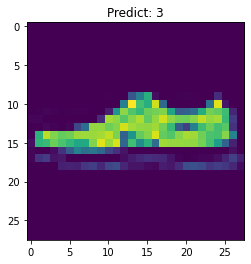

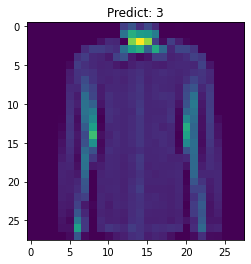

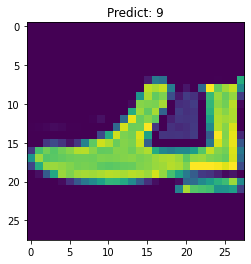

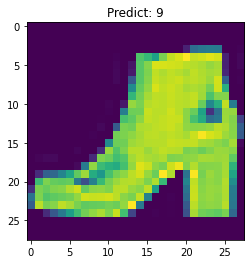

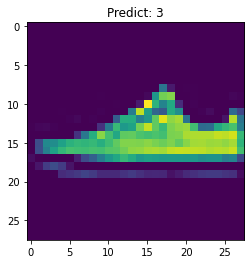

In [16]:
# Print the Image and the Prediction
index_list = np.random.randint(low=0, high=predict.shape[0], size=5)

for id in index_list:
    plt.figure()
    plt.title(f'Predict: {np.argmax(predict, axis=1)[id]}')
    plt.imshow(x_test2[id].reshape((28,28)))

# Autoencoder

In [17]:
# Here, we will do some exploration with Autoencoders
# First, we are compressing the data into 3 nodes and then expanding it again

input = keras.layers.Input((x_train2.shape[1]))
x = keras.layers.Dense(512, activation='elu') (input)
x = keras.layers.Dense(256, activation='elu') (x)
x = keras.layers.Dense(64, activation='elu') (x)
x = keras.layers.Dense(8, activation='elu') (x)
x = keras.layers.Dense(3) (x)
x = keras.layers.Dense(8, activation='elu') (x)
x = keras.layers.Dense(64, activation='elu') (x)
x = keras.layers.Dense(256, activation='elu') (x)
x = keras.layers.Dense(512, activation='elu') (x)
output = keras.layers.Dense(x_train2.shape[1]) (x)

model = keras.Model(input, output)
model.compile(optimizer='adam', loss=keras.losses.mse, metrics='mse')

In [18]:
# Decrease the batch_size if you don't have a GPU!
# We are using the original data as input and output!
history = model.fit(x_train2, x_train2, validation_data=(x_test2, x_test2), epochs=100, batch_size=4096)

Epoch 1/100
15/15 [==============================] - 1s 34ms/step - loss: 7870.6289 - mse: 7870.6289 - val_loss: 4707.3740 - val_mse: 4707.3740
Epoch 2/100
15/15 [==============================] - 0s 15ms/step - loss: 4482.8413 - mse: 4482.8413 - val_loss: 4316.7534 - val_mse: 4316.7534
Epoch 3/100
15/15 [==============================] - 0s 15ms/step - loss: 4259.3037 - mse: 4259.3037 - val_loss: 4111.5698 - val_mse: 4111.5698
Epoch 4/100
15/15 [==============================] - 0s 14ms/step - loss: 3755.1050 - mse: 3755.1050 - val_loss: 3323.4778 - val_mse: 3323.4778
Epoch 5/100
15/15 [==============================] - 0s 14ms/step - loss: 3196.4287 - mse: 3196.4287 - val_loss: 3086.6555 - val_mse: 3086.6555
Epoch 6/100
15/15 [==============================] - 0s 14ms/step - loss: 3015.9543 - mse: 3015.9543 - val_loss: 2876.9451 - val_mse: 2876.9451
Epoch 7/100
15/15 [==============================] - 0s 14ms/step - loss: 2813.9641 - mse: 2813.9641 - val_loss: 2731.0896 - val_mse: 27

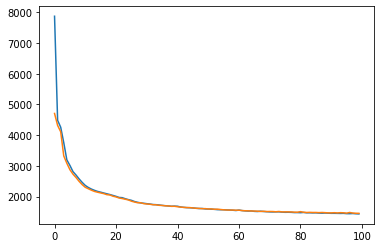

In [19]:
# Let's see how good our model is for reconstructing the image...
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

In [20]:
# Pick a Random Image for Comparison
id = np.random.randint(low=0, high=x_test2.shape[0])

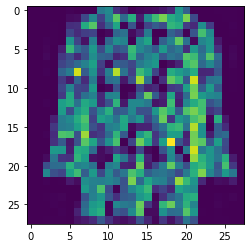

In [21]:
# Input Image
plt.imshow(x_test2[id].reshape((28,28)))

In [22]:
# Let's Run the Model and see what the Output Look Like
predict = model.predict(x_test2[id:id+1])

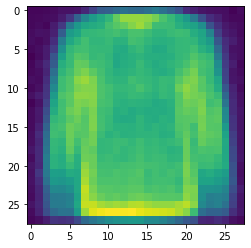

In [23]:
# The Output... not bad, a bit blurry?
plt.imshow(predict[0].reshape((28,28)))

### Autoencoder - Filter

In [24]:
# Let's see how an Autoencoder hand corrupted input!
# Here, we will make a copy of the image and take out a chunk
corrupted_image = x_test2[id].copy()

In [25]:
corrupted_image = corrupted_image.reshape(28,28) 

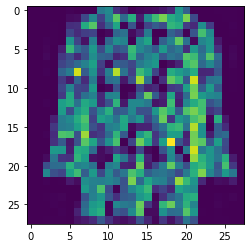

In [26]:
plt.imshow(corrupted_image)

In [27]:
corrupted_image[10:15,:] = 0

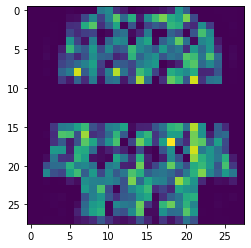

In [28]:
plt.imshow(corrupted_image)

In [29]:
# Let's run it through the Autoencoder
predict = model.predict(corrupted_image.reshape(1,28*28))

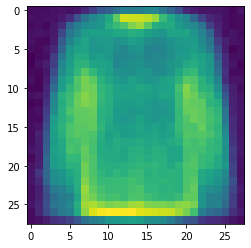

In [30]:
# Like magic, it automatically fix some part of it.
# It might not be perfect, but a good try right?
plt.imshow(predict[0].reshape((28,28)))

### Autoencoder - Generative Model

In [31]:
# Let's take a look at the architecture... what if we separate the mode and see what kind of data the image get compressed to?
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 8)                 520       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
 dense_9 (Dense)             (None, 8)                 32  

In [32]:
# Let's freeze the model first, so the weight can't be changed
for layer in model.layers:
    model.layers[0].trainable = False

In [33]:
model.trainable = False

In [34]:
len(model.layers)

11

In [35]:
# Reconstruct the Encoder
input3 = keras.Input((x_train2.shape[1]))
x = model.layers[1] (input3)
x = model.layers[2] (x)
x = model.layers[3] (x)
x = model.layers[4] (x)
output3 = model.layers[5] (x)

model3 = keras.Model(input3, output3)

In [36]:
# Take a Random Image and Run it Through the Model
id = np.random.randint(low=0, high=x_test2.shape[1])

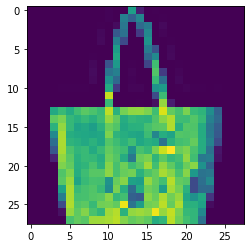

In [37]:
plt.imshow(x_test2[id].reshape(28,28))

In [38]:
predict = model.predict(x_test2[id].reshape(1,28*28))

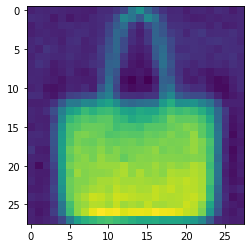

In [39]:
plt.imshow(predict[0].reshape((28,28)))

In [40]:
# Run the Same Image through the Encoder model... let's see its DNA
# Amazing how the IMage can be summarized using only 3 numbers right?
dna = model3(x_test2[id:id+1])[0]
dna

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 2452.8774,  1943.0237, -1438.1089], dtype=float32)>

In [41]:
len(model.layers)

11

In [42]:
# Let's Define the Decoder Model
input2 = keras.layers.Input(dna.shape[0])
x = model.layers[6] (input2)
x = model.layers[7] (x)
x = model.layers[8] (x)
x = model.layers[9] (x)
output2 = model.layers[10] (x)

In [43]:
model2 = keras.Model(input2, output2)

In [44]:
dna.shape

TensorShape([3])

In [45]:
dna

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 2452.8774,  1943.0237, -1438.1089], dtype=float32)>

[2000, -2000, 3000]
[2000, -1950, 3000]
[2000, -1900, 3000]
[2000, -1850, 3000]
[2000, -1800, 3000]
[2000, -1750, 3000]
[2000, -1700, 3000]
[2000, -1650, 3000]
[2000, -1600, 3000]
[2000, -1550, 3000]
[2000, -1500, 3000]
[2000, -1450, 3000]
[2000, -1400, 3000]
[2000, -1350, 3000]
[2000, -1300, 3000]
[2000, -1250, 3000]
[2000, -1200, 3000]
[2000, -1150, 3000]
[2000, -1100, 3000]
[2000, -1050, 3000]
[2000, -1000, 3000]
[2000, -950, 3000]
[2000, -900, 3000]
[2000, -850, 3000]
[2000, -800, 3000]
[2000, -750, 3000]
[2000, -700, 3000]
[2000, -650, 3000]
[2000, -600, 3000]
[2000, -550, 3000]
[2000, -500, 3000]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


[2000, -450, 3000]
[2000, -400, 3000]
[2000, -350, 3000]
[2000, -300, 3000]
[2000, -250, 3000]
[2000, -200, 3000]
[2000, -150, 3000]
[2000, -100, 3000]
[2000, -50, 3000]
[2000, 0, 3000]
[2000, 50, 3000]
[2000, 100, 3000]
[2000, 150, 3000]
[2000, 200, 3000]
[2000, 250, 3000]
[2000, 300, 3000]
[2000, 350, 3000]
[2000, 400, 3000]
[2000, 450, 3000]
[2000, 500, 3000]
[2000, 550, 3000]
[2000, 600, 3000]
[2000, 650, 3000]
[2000, 700, 3000]
[2000, 750, 3000]
[2000, 800, 3000]
[2000, 850, 3000]
[2000, 900, 3000]
[2000, 950, 3000]
[2000, 1000, 3000]
[2000, 1050, 3000]
[2000, 1100, 3000]
[2000, 1150, 3000]
[2000, 1200, 3000]
[2000, 1250, 3000]
[2000, 1300, 3000]
[2000, 1350, 3000]
[2000, 1400, 3000]
[2000, 1450, 3000]
[2000, 1500, 3000]
[2000, 1550, 3000]
[2000, 1600, 3000]
[2000, 1650, 3000]
[2000, 1700, 3000]
[2000, 1750, 3000]
[2000, 1800, 3000]
[2000, 1850, 3000]
[2000, 1900, 3000]
[2000, 1950, 3000]


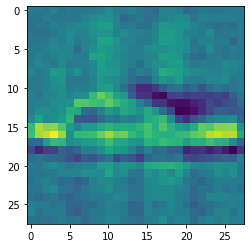

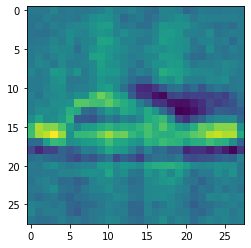

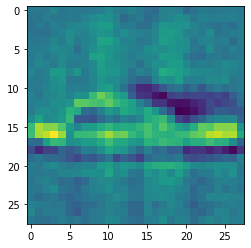

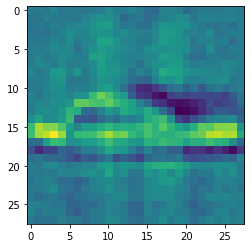

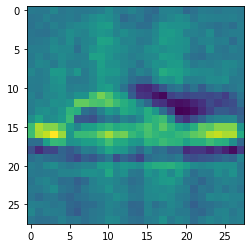

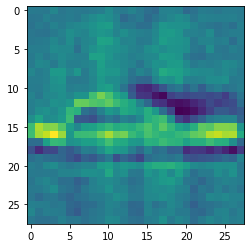

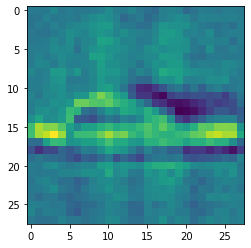

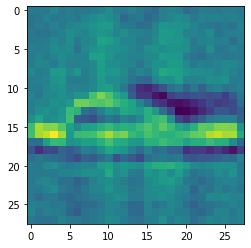

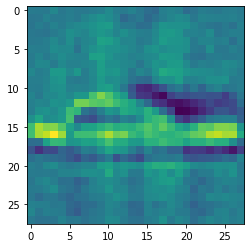

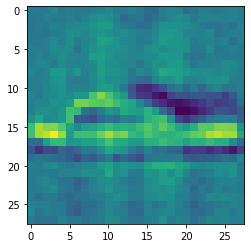

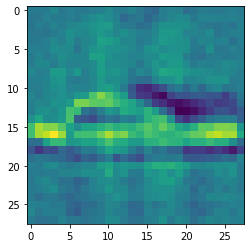

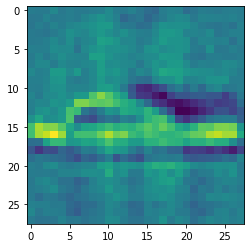

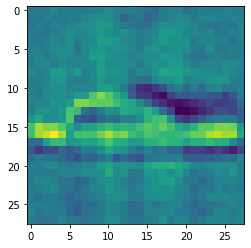

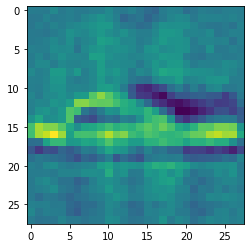

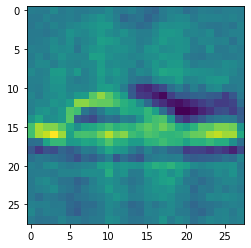

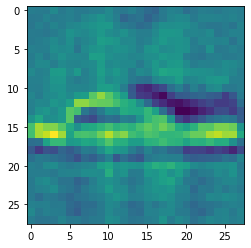

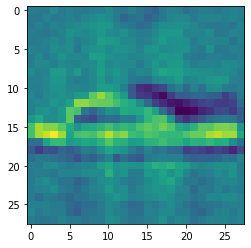

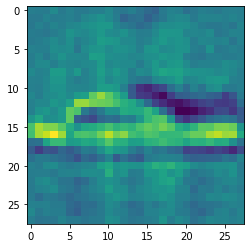

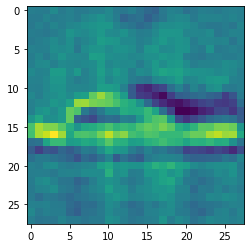

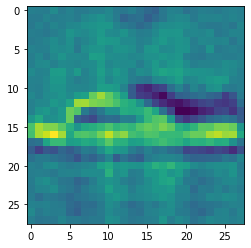

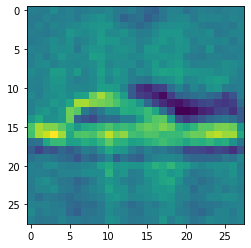

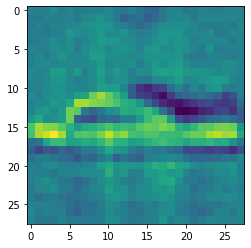

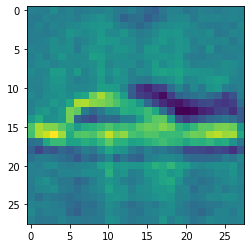

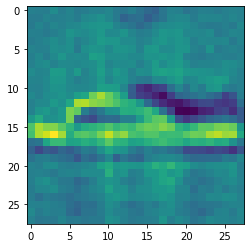

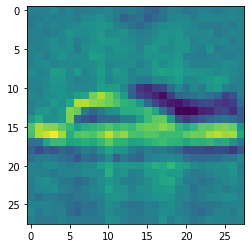

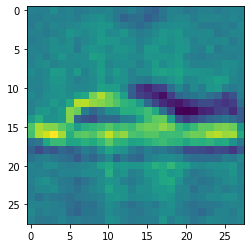

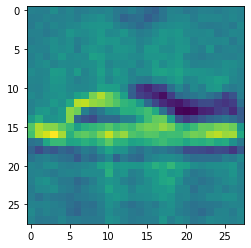

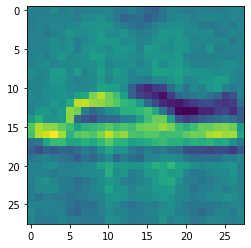

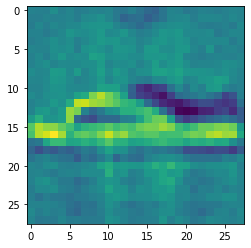

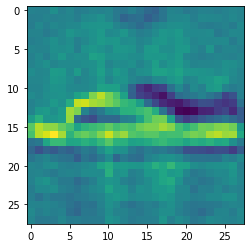

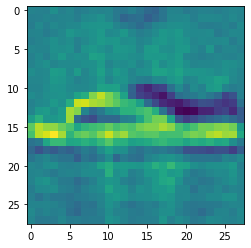

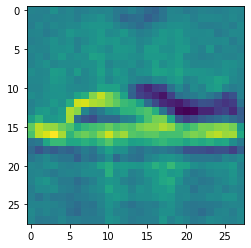

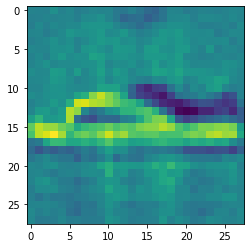

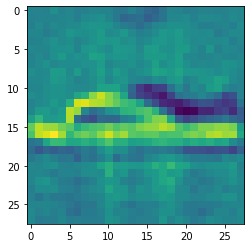

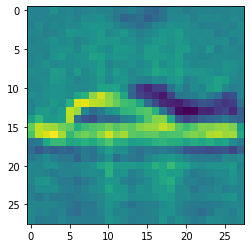

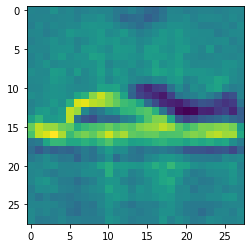

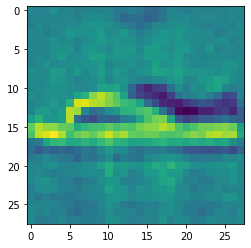

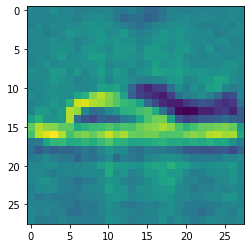

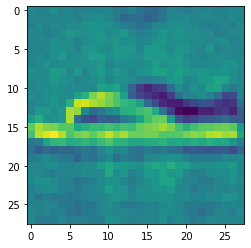

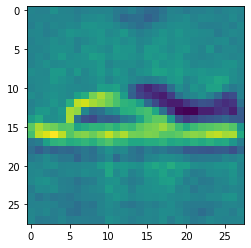

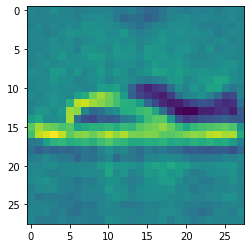

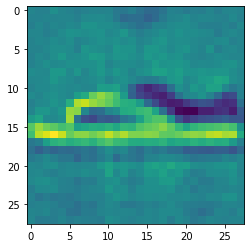

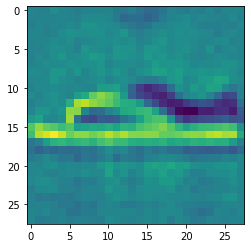

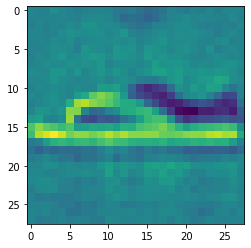

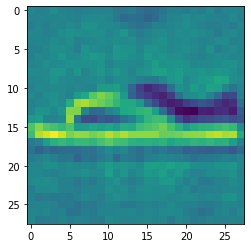

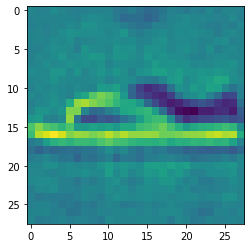

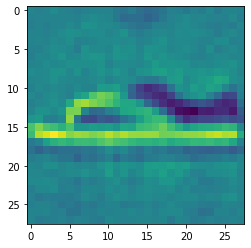

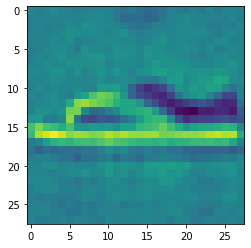

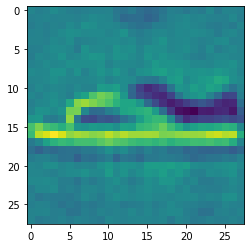

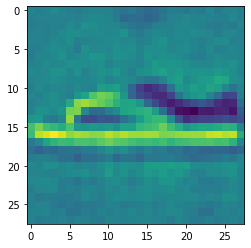

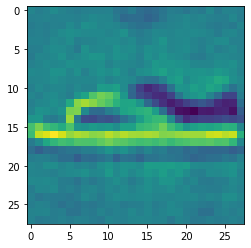

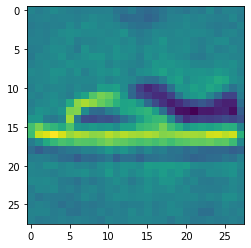

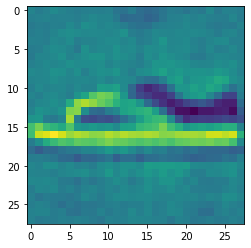

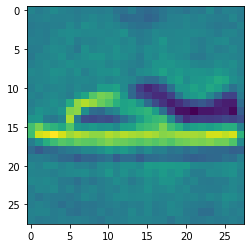

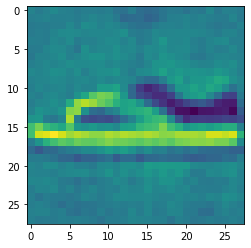

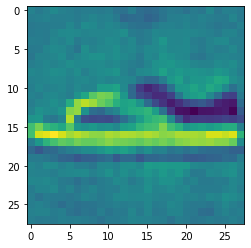

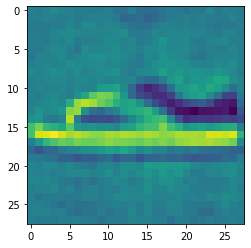

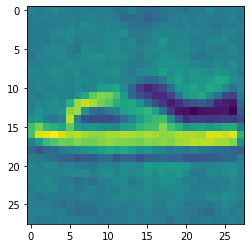

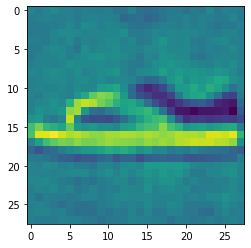

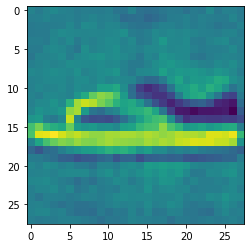

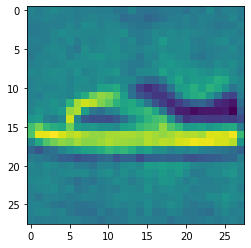

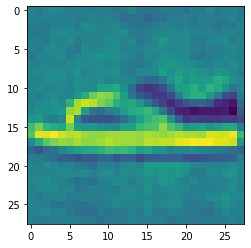

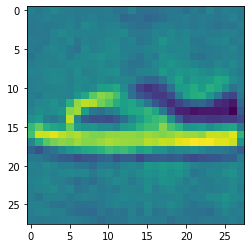

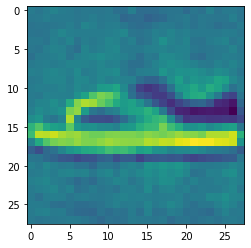

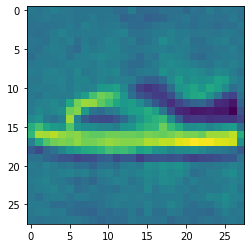

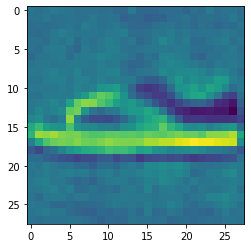

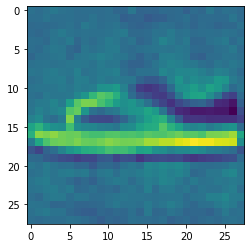

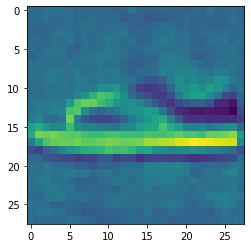

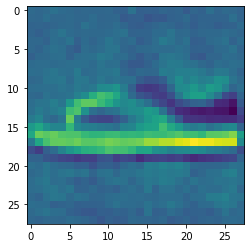

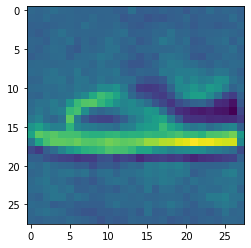

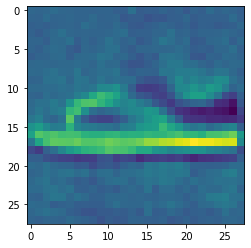

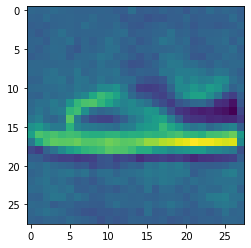

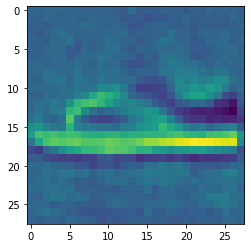

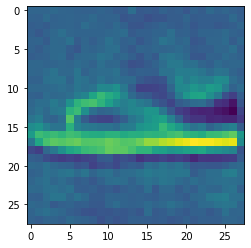

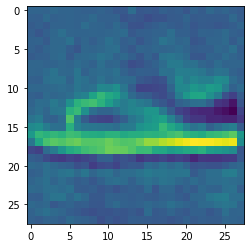

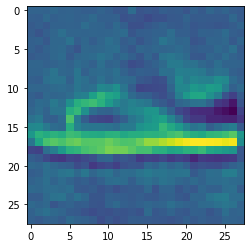

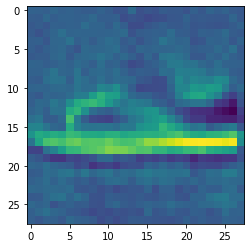

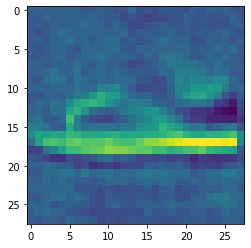

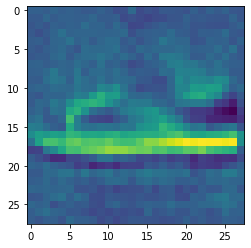

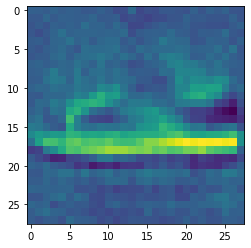

In [46]:
# Take the original DNA as reference, what if we alter the values in the DNA? 
# Try different element to alter...
# The Range should be similar to the old one
for value in range(-2000,2000,50):
    dna2 = [2000, value, 3000]
    print(dna2)
    dna2 = np.expand_dims(dna2,0)
    predict = model2(dna2)
    plt.figure()
    plt.imshow(np.reshape(predict,(28,28)))